In [6]:
## For some arithmetic and Matrix Operations
import numpy as np
## For Visualization
import matplotlib.pyplot as plt
## Dataframe Manipulation
import pandas as pd

df = pd.read_csv('/content/df_for_proj (1).csv')

df.head()


,Unnamed: 0,Heart_Disease,Sex,Depression,BMI,FriedPotato_Consumption,Alcohol_Consumption,Fruit_Consumption
0,0,0,0,0,14.54,12.0,0.0,30.0
1,1,1,0,0,28.29,4.0,0.0,30.0
2,2,0,0,0,33.47,16.0,4.0,12.0
3,3,1,1,0,28.73,8.0,0.0,30.0
4,4,0,1,0,24.37,0.0,0.0,8.0


#**Q1 - Estimating**

our question is: Does the value of alcohol consumption differ between people who are considered to be suffering from depression and people who are not


## Q1.1 - Printing the means of the variables.

In [107]:
df_depressed = df[df['Depression']==1]
df_not_Depressed = df[df['Depression']==0]

mean_alcohol_cons_depressed_q1=np.mean(df_depressed['Alcohol_Consumption'])
mean_alcohol_cons_not_depressed_q1=np.mean(df_not_Depressed['Alcohol_Consumption'])




print('The mean of Alcohol_Consumption amongst depressed is: ' + str(round(mean_alcohol_cons_depressed_q1, 3)))
print('The mean of Alcohol_Consumption among the not depressed is: ' + str(round(mean_alcohol_cons_not_depressed_q1, 3)))


The mean of Alcohol_Consumption amongst depressed is: 4.636
The mean of Alcohol_Consumption among the not depressed is: 5.212


##Q1.2 - Calculating estimated P-vals for each category.

In [108]:
df_depressed = df[df['Depression']==1]
df_not_Depressed = df[df['Depression']==0]
#we dont have null values
n_Depressed=len(df_depressed)
n_not_Depressed=len(df_not_Depressed)

sample_variance_depressed=df_depressed['Alcohol_Consumption'].var(ddof=0)
sample_variance_not_depressed=df_not_Depressed['Alcohol_Consumption'].var(ddof=0)


se_depressed=np.sqrt((1/n_Depressed)*sample_variance_depressed)
se_not_depressed=np.sqrt((1/n_not_Depressed)*sample_variance_not_depressed)

#conf interval with confidence level of 95%
conf_interval_depressed_q1=[ mean_alcohol_cons_depressed_q1 - 2*se_depressed ,mean_alcohol_cons_depressed_q1 + 2*se_depressed]
conf_interval_not_depressed_q1=[ mean_alcohol_cons_not_depressed_q1 - 2*se_not_depressed ,mean_alcohol_cons_not_depressed_q1 + 2*se_not_depressed]

print("The Confidence interval of Alcohol consumption expectation among Depressed is: "+ str(conf_interval_depressed_q1))
print("The Confidence interval of Alcohol consumption expectation among not Depressed is: "+ str(conf_interval_not_depressed_q1))


The Confidence interval of Alcohol consumption expectation among Depressed is: [4.572291519976303, 4.698867265826835]
The Confidence interval of Alcohol consumption expectation among not Depressed is: [5.178560178928732, 5.245172272185448]


##Q1.3 - Comparing P-vals.

Both of the confidence intervals don't overlap,
By this result we can tell that if given the real expectation of one of the categories above, we will be able to tell to which category it belongs.


#**Q2 - Hypothesis Tests**


##Q2.1 - Writing the hypothesis.
denote:<br>
     $μ_1$ - The expectation of Alcohol consumption among depressed.<br>
     $μ_2$ - The expectation of Alcohol consumption among not depressed.
<br>Then,
 <br>$H_0$: $μ_1-μ_2$=0<br>
 $H_1$: $μ_1-μ_2\not=0$

##Q2.2 - Assumptions of T-test.


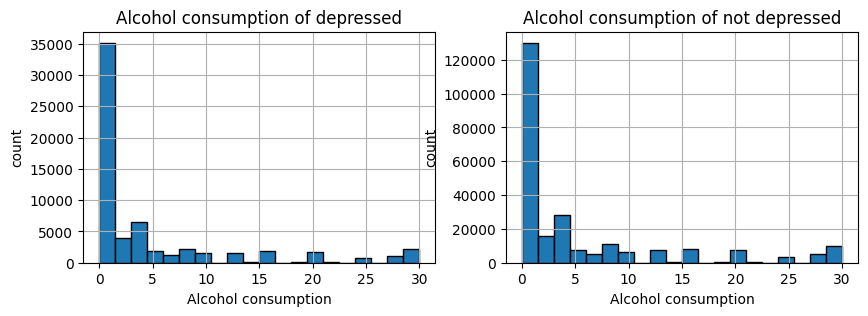

In [109]:
import matplotlib.pyplot as plt

fig,(ax1, ax2)= plt.subplots(1,2,figsize=(10,3))
df_depressed['Alcohol_Consumption'].hist(edgecolor='black', grid=True, bins=20, ax=ax1)
ax1.set_title("Alcohol consumption of depressed")
ax1.set_xlabel("Alcohol consumption")
ax1.set_ylabel("count")


df_not_Depressed['Alcohol_Consumption'].hist(edgecolor='black', grid=True, bins=20, ax=ax2)
ax2.set_title("Alcohol consumption of not depressed")
ax2.set_xlabel("Alcohol consumption")
ax2.set_ylabel("count")
plt.show()

**1.Normal Distribution of the data:**
 We can see that the distribution is not normal according to the Histogram so already from that we can say that not all the assumptions for T-test hold.


**2.Equal Variances:**
we will use the F test to check the if the sample variances are equal:
<br>$𝐻_0: 𝜎_𝑋
^2 = 𝜎_𝑌
^2$

$𝐻_1: 𝜎_𝑋
^2 ≠ 𝜎_𝑌
^2
$

𝑇. 𝑆. : 𝐹 =
$𝑆_𝑋
^2/
𝑆_𝑌
^2 $∼$F_(n-1,m-1)$


𝑅. 𝑅. : 𝐹 > 𝐹(𝑛−1,𝑚−1),$

In [110]:
import scipy.stats as stats

F_stat_test= sample_variance_not_depressed/sample_variance_depressed

F_p_value= 1-stats.f.cdf(F_stat_test,n_not_Depressed-1,n_Depressed-1)
F_test_quantile= stats.f.ppf(0.95,n_not_Depressed-1,n_Depressed-1)

print("F statistic for test is:"+ str(F_stat_test))
print("F test quantile: " + str(F_test_quantile))
print("P value: " +  str(F_p_value))
print("is in Rejection zone? "  + str(F_stat_test>F_test_quantile))

F statistic for test is:1.1048970494008945
F test quantile: 1.010530115320063
P value: 1.1102230246251565e-16
is in Rejection zone? True


We can see by the F_test that the variances of Alcohol consumption of depressed aginst Alcohol consumption of not depressed pepole are not equal.
<br>**3.Size of the data:**This assumption holds. our dataset is bigger than 30 querries.
<br>**4.Independent Variables:** Another condition for using the T-test is independent variables. Since we already saw that 2 of the 4 assumptions do not hold, there is no need to continue checking.
<br>To conclude, the assumptions for using the T-test do not hold.

##Q2.3 - Using T-test on mean difference with equal variances.


In [111]:

#maybe to delete
T_statistic, T_p_value =stats.ttest_ind(df_not_Depressed['Alcohol_Consumption'],df_depressed['Alcohol_Consumption'])

T_test_quantile=stats.t.ppf(0.975, n_not_Depressed + n_Depressed - 2)

print("T statistic for test is:"+ str(T_statistic))
print("T test quantile: " + str(T_test_quantile))
print("P value: " +  str(T_p_value))
print("is in Rejection zone? "  + str(abs(T_statistic)>T_test_quantile))

T statistic for test is:15.641847297285302
T test quantile: 1.9599716655017085
P value: 3.965072642042974e-55
is in Rejection zone? True


##Q2.4 - Using Wald-test.


In [112]:
Wald_statistic_q2=(mean_alcohol_cons_not_depressed_q1 - mean_alcohol_cons_depressed_q1)/np.sqrt(sample_variance_not_depressed/n_not_Depressed + sample_variance_depressed/n_Depressed)
wald_test_quantile=stats.norm.ppf(0.975)
Wald_p_value_q2= 2*stats.norm.cdf(-abs(Wald_statistic_q2))

print()
print("Wald statistic for test is:"+ str(Wald_statistic_q2))
print("Wald test quantile: " + str(wald_test_quantile))
print("P value: " +  str(Wald_p_value_q2))
print("is in Rejection zone? "  + str(abs(Wald_statistic_q2)>wald_test_quantile))


Wald statistic for test is:16.116132681926754
Wald test quantile: 1.959963984540054
P value: 1.9652965462982282e-58
is in Rejection zone? True


##Q2.5 - Comparing the tests results.


By observing the results of the each test, we can see that the quantiles are similiar between the two tests.
<br>Also, the quantiles of the two tests are almost identical.
<br>Furthermore, We reject the null hypothesis for each test and while there is a difference in values between the P-Vals, both of them are very small and both of them are statistically significant and it is safe to assume for every reasonable significance level that the means of both variables are not equal.



##Q2.6 - Likelihood ratio test.


In [113]:
# Creating a helper function for calculations
def sum_elements_for_category(number_of_samples,sample_values, S_p_squared, sample_variance, mu_estimate_category, mu_estimate_all):
    total_sum = 0
    for i in range(number_of_samples):
        total_sum += ((sample_values[i] - mu_estimate_all)**2 / sample_variance - (sample_values[i] - mu_estimate_category)**2 / S_p_squared)
    return total_sum


In [114]:
# calculating the Likelihood test
## L-statitistic is calculated according to the formula we found added in the end of the pdf file.
import math
SP_squared = ((n_Depressed-1)*sample_variance_depressed+(n_not_Depressed-1)*sample_variance_not_depressed)/(n_Depressed+n_not_Depressed-2)

sample_values_depressed = df_depressed["Alcohol_Consumption"].values
sample_values_not_depressed = df_not_Depressed["Alcohol_Consumption"].values
sample_variance = df["Alcohol_Consumption"].var(ddof=0)
n_total = n_Depressed + n_not_Depressed
mu_estiamate_all = df["Alcohol_Consumption"].mean()
mu_depressed=df_depressed['Alcohol_Consumption'].mean()
mu_not_depressed=df_not_Depressed['Alcohol_Consumption'].mean()


depressed_sum = sum_elements_for_category(n_Depressed,sample_values_depressed, SP_squared, sample_variance, mu_depressed, mu_estiamate_all)
not_depressed_sum = sum_elements_for_category(n_not_Depressed, sample_values_not_depressed, SP_squared, sample_variance, mu_not_depressed, mu_estiamate_all)
L_statistic = n_total*math.log(sample_variance/SP_squared) + depressed_sum + not_depressed_sum

print("The statistic is: "+ str(L_statistic))
# Chi-squared degrees of freedom : r-q = 1.
test_quantile=stats.chi2.ppf(0.95,1)
print("The quantile is: "+ str(test_quantile))

print("is in Rejection zone? "  + str(L_statistic > test_quantile))

The statistic is: 244.5721110505775
The quantile is: 3.841458820694124
is in Rejection zone? True


#Q3 - Varrying sample sizes

In [115]:
df_full = pd.read_csv('/content/df_for_proj (1).csv')

df_full.head()


,Unnamed: 0,Heart_Disease,Sex,Depression,BMI,FriedPotato_Consumption,Alcohol_Consumption,Fruit_Consumption
0,0,0,0,0,14.54,12.0,0.0,30.0
1,1,1,0,0,28.29,4.0,0.0,30.0
2,2,0,0,0,33.47,16.0,4.0,12.0
3,3,1,1,0,28.73,8.0,0.0,30.0
4,4,0,1,0,24.37,0.0,0.0,8.0


In [116]:
# Writing a function for the Wald test for all the sample sizes
def wald_test(mean_alcohol_cons_not_depressed, mean_alcohol_cons_depressed, sample_variance_not_depressed, sample_variance_depressed, n_not_Depressed, n_Depressed ,to_print):

  Wald_statistic=(mean_alcohol_cons_not_depressed - mean_alcohol_cons_depressed)/np.sqrt(sample_variance_not_depressed/n_not_Depressed + sample_variance_depressed/n_Depressed)
  wald_test_quantile=stats.norm.ppf(0.975)
  Wald_p_value= 2*stats.norm.cdf(-abs(Wald_statistic))
  if to_print is True:
    print()
    print("Wald statistic for test is:"+ str(Wald_statistic))
    print("Wald test quantile: " + str(wald_test_quantile))
    print("P value: " +  str(Wald_p_value))
    print("is in Rejection zone? "  + str(abs(Wald_statistic)>wald_test_quantile))

  return Wald_p_value

##Q3.1-3 - Creating varrying sizes samples and printing.

In [117]:
# Create a dictionary of confidence intervals with keys being the number of samples and array.
sample_conf_interval_dict = {30: [0, 0], 50: [0, 0], 100: [0, 0], 500: [0, 0]}
len_conf_interval_depressed_q1=conf_interval_depressed_q1[1]-conf_interval_depressed_q1[0]
len_conf_interval_not_depressed_q1=conf_interval_not_depressed_q1[1]-conf_interval_not_depressed_q1[0]

# Creating a function to sample and print the data.
def Sampling_testing_comparing(comparing_q1,to_print):
  len_confidence_depressed_list=list()
  len_confidence_not_depressed_list=list()
  p_values_list=list()

  num_of_random_samples=[30,50,100,500]
  for i in num_of_random_samples:
      n_depressed = 0
      n_not_Depressed=0
      while n_depressed==0 or n_not_Depressed==0:
        sample_df=df_full.sample(i)
        df_depressed = sample_df[sample_df['Depression']==1]
        df_not_Depressed = sample_df[sample_df['Depression']==0]
        n_depressed=len(df_depressed)#we dont have null
        n_not_Depressed=len(df_not_Depressed)

      mean_alcohol_cons_depressed=np.mean(df_depressed['Alcohol_Consumption'])
      mean_alcohol_cons_not_depressed=np.mean(df_not_Depressed['Alcohol_Consumption'])

      sample_variance_depressed=df_depressed['Alcohol_Consumption'].var(ddof=0)
      sample_variance_not_depressed=df_not_Depressed['Alcohol_Consumption'].var(ddof=0)

      se_depressed=np.sqrt((1/n_depressed)*sample_variance_depressed)
      se_not_depressed=np.sqrt((1/n_not_Depressed)*sample_variance_not_depressed)

      #conf interval with confidence level of 95%
      conf_interval_depressed=[ mean_alcohol_cons_depressed - 2*se_depressed ,mean_alcohol_cons_depressed + 2*se_depressed]
      conf_interval_not_depressed=[ mean_alcohol_cons_not_depressed - 2*se_not_depressed ,mean_alcohol_cons_not_depressed + 2*se_not_depressed]

      #calcualte len of the confidence interval and add it to the list
      len_conf_depressed=conf_interval_depressed[1] - conf_interval_depressed[0]
      len_conf_not_depressed= conf_interval_not_depressed[1] - conf_interval_not_depressed[0]
      len_confidence_depressed_list.append(len_conf_depressed)
      len_confidence_not_depressed_list.append(len_conf_not_depressed)



    #campare to question 1 calcualte the times that the real mean is inside the current confidence interval
      if mean_alcohol_cons_not_depressed_q1>=conf_interval_not_depressed[0] and mean_alcohol_cons_not_depressed_q1<=conf_interval_not_depressed[1]:
          sample_conf_interval_dict[i][0] += 1
      if mean_alcohol_cons_depressed_q1>=conf_interval_depressed[0] and mean_alcohol_cons_depressed_q1<=conf_interval_depressed[1]:
          sample_conf_interval_dict[i][1] += 1


      if comparing_q1:

        print("the size of the current sample is: "+str(i))

        print("The Confidance Interval for Depressed in the current Sample Is: "+ str(conf_interval_depressed)+" with Length: "+ str(len_conf_depressed)+ ", the mean is: "+ str(mean_alcohol_cons_depressed))

        print("The Confidance Interval for Depressed in the Q1 Is: "+ str(conf_interval_depressed_q1)+" with Length: "+ str(len_conf_interval_depressed_q1)+", the mean is: "+ str(mean_alcohol_cons_depressed_q1))

        print("The Confidance Interval for not Depressed in the current Sample Is: "+ str(conf_interval_not_depressed)+" with Length: "+ str(len_conf_not_depressed)+", the mean is: "+ str(mean_alcohol_cons_not_depressed))
        print("The Confidance Interval for not Depressed in the Q1 Is: "+ str(conf_interval_depressed_q1)+" with Length: "+ str(len_conf_interval_not_depressed_q1)+", the mean is: "+ str(mean_alcohol_cons_not_depressed_q1))


        #calculate the p value of Wald's test and add it to the list
      Wald_p_value=wald_test(mean_alcohol_cons_not_depressed, mean_alcohol_cons_depressed, sample_variance_not_depressed, sample_variance_depressed, n_not_Depressed, n_depressed ,to_print)
      print()
      p_values_list.append(Wald_p_value)

  if to_print is False:

    return    p_values_list, len_confidence_not_depressed_list, len_confidence_depressed_list



In [118]:
Sampling_testing_comparing(True,True)

the size of the current sample is: 30
The Confidance Interval for Depressed in the current Sample Is: [0.4548817692925633, 15.045118230707438] with Length: 14.590236461414875, the mean is: 7.75
The Confidance Interval for Depressed in the Q1 Is: [4.572291519976303, 4.698867265826835] with Length: 0.12657574585053233, the mean is: 4.635579392901569
The Confidance Interval for not Depressed in the current Sample Is: [2.70960014008572, 7.5631271326415535] with Length: 4.8535269925558335, the mean is: 5.136363636363637
The Confidance Interval for not Depressed in the Q1 Is: [4.572291519976303, 4.698867265826835] with Length: 0.06661209325671535, the mean is: 5.21186622555709

Wald statistic for test is:-0.6799113333788372
Wald test quantile: 1.959963984540054
P value: 0.49656060504642996
is in Rejection zone? False

the size of the current sample is: 50
The Confidance Interval for Depressed in the current Sample Is: [0.27352142083895603, 3.1550500077324726] with Length: 2.8815285868935163,

###Q3.1-3 - Comparing the results.

As we can see, with each gorwth of the sample size, the calculated mean and the length of the confidance intervals for both variables gets more percise and closer to the same values calculated on the entire dataframe in Q1. <br>Furthermore, we can see that in each growth, the overlap of the intervals gets smaller, so we can see that as the sample size grows, we can understand more clearly the source of the samples mean.

In addition, by applying Wald's test to each sample size, we can see that in small sizes, the test statistic is not big enough and we don't reject the null hypothesis. It is only when the sample size is big enough, i.e 500, that we reject the null hypothesis according to Wald's test, like we did in Q2.
Those results match the pattern we see with the overlap of the Confidance intervals - When the overlap is small enough to tell the variables apart, we get a much clearer view of the difference in means.

Overall, for both the Confidance interval and Wald's test, we can see that by applying the tests on bigger sample sizes, we get more accurate and credible with the results.

##Q3.4 - Repeating the question 100 times.

In [ ]:
# Creating lists to store all the samples.
list_Conf_interval_30s_depressed=list()
list_Conf_interval_50s_depressed=list()
list_Conf_interval_100s_depressed=list()
list_Conf_interval_500s_depressed=list()

list_Conf_interval_30s_not_depressed=list()
list_Conf_interval_50s_not_depressed=list()
list_Conf_interval_100s_not_depressed=list()
list_Conf_interval_500s_not_depressed=list()
p_values_30s=list()
p_values_50s=list()
p_values_100s=list()
p_values_500s=list()

sample_conf_interval_dict = {30: [0, 0], 50: [0, 0], 100: [0, 0], 500: [0, 0]}
for i in range(100):
  p_values_list, len_confidence_not_depressed_list, len_confidence_depressed_list=Sampling_testing_comparing(False,False)
  #taking the p values from each itteration to the appropriate sample sizes
  p_values_30s.append(p_values_list[0])
  p_values_50s.append(p_values_list[1])
  p_values_100s.append(p_values_list[2])
  p_values_500s.append(p_values_list[3])

  list_Conf_interval_30s_not_depressed.append(len_confidence_not_depressed_list[0])
  list_Conf_interval_50s_not_depressed.append(len_confidence_not_depressed_list[1])
  list_Conf_interval_100s_not_depressed.append(len_confidence_not_depressed_list[2])
  list_Conf_interval_500s_not_depressed.append(len_confidence_not_depressed_list[3])

  list_Conf_interval_30s_depressed.append(len_confidence_depressed_list[0])
  list_Conf_interval_50s_depressed.append(len_confidence_depressed_list[1])
  list_Conf_interval_100s_depressed.append(len_confidence_depressed_list[2])
  list_Conf_interval_500s_depressed.append(len_confidence_depressed_list[3])



In [123]:
# Writing a function for plotting a Scatter-plot.
import numpy as np
import matplotlib.pyplot as plt
def Scatter(group1, group2, group3, group4, title, y_axis_title):
  # Define sample sizes
  sample_sizes = [30, 50, 100, 500]

  # Define p-values for each sample size and group
  # Each data_set contains 100 p-values
  p_values = {
      30: [group1],
      50: [group2],
      100: [group3],
      500: [group4]
  }

  # Plot scatter plot for each group
  plt.figure(figsize=(8, 6))
  for group in range(1):  # Assuming each sample size has only one group
      for size in sample_sizes:
          x = np.repeat(size, 100)
          plt.scatter(x, p_values[size][group], alpha=0.5, label=f'Sample Size {size}')

  plt.title(str(title))
  plt.xlabel('Sample Sizes')
  plt.ylabel(str(y_axis_title))
  plt.xticks(sample_sizes)
  plt.legend()
  plt.grid(True)
  plt.show()

### **Plots for P-val:**

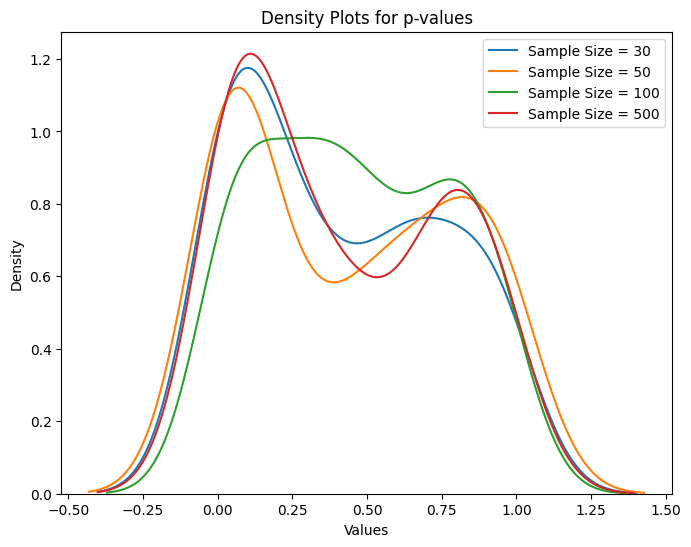

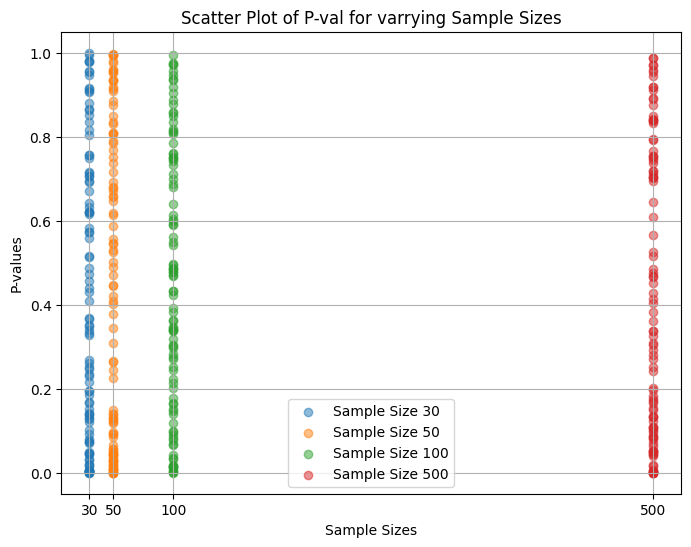

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot KDE
def plot_kde(ax, data, sample_size, data_type):
    sns.kdeplot(data,label=f"Sample Size = {sample_size}", ax=ax)
    ax.legend()

# Create a figure and axis object
fig, ax = plt.subplots(figsize=(7.88, 6))

# Plot p-values for Sample Sizes 30 and 50
plot_kde(ax, p_values_30s, 30, "p-values" )
plot_kde(ax, p_values_50s, 50, "p-values")
plot_kde(ax, p_values_100s, 100, "p-values")
plot_kde(ax, p_values_500s, 500, "p-values")

# Add a title and labels
ax.set_title("Density Plots for p-values")
ax.set_xlabel("Values")
ax.set_ylabel("Density")

plt.show()
#plt.tight_layout()

# plotting the scatter plot
Scatter(p_values_30s, p_values_50s, p_values_100s, p_values_500s, 'Scatter Plot of P-val for varrying Sample Sizes', 'P-values')


### Plots for CI lengths among depressed:

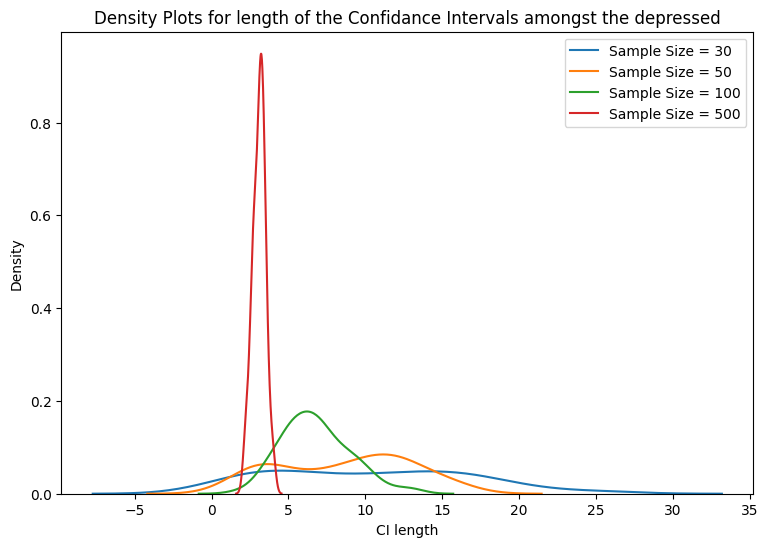

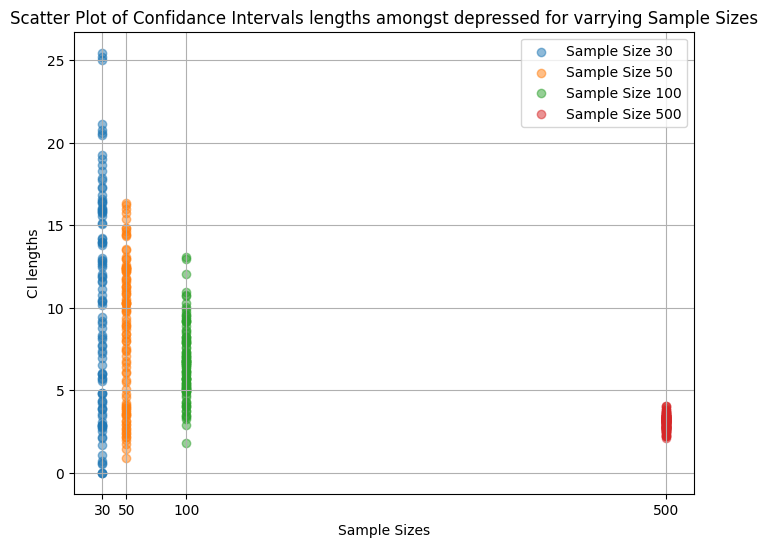

In [134]:


# Create a figure and axis object
fig, ax = plt.subplots(figsize=(8.93, 6))

# Set the x-axis limits
#ax.set_xlim(left=0)

# Plot p-values for Sample Sizes 30 and 50
plot_kde(ax, list_Conf_interval_30s_depressed, 30, "CI_depressed")
plot_kde(ax, list_Conf_interval_50s_depressed, 50, "CI_depressed")
plot_kde(ax, list_Conf_interval_100s_depressed, 100, "CI_depressed")
plot_kde(ax, list_Conf_interval_500s_depressed, 500, "CI_depressed")

# Add a title and labels
ax.set_title("Density Plots for length of the Confidance Intervals amongst the depressed")
ax.set_xlabel("CI length")
ax.set_ylabel("Density")

# plotting the scatter plot
Scatter(list_Conf_interval_30s_depressed, list_Conf_interval_50s_depressed,
        list_Conf_interval_100s_depressed, list_Conf_interval_500s_depressed,
        'Scatter Plot of Confidance Intervals lengths amongst depressed for varrying Sample Sizes', 'CI lengths')



### Plots for CI lengths among not depressed:

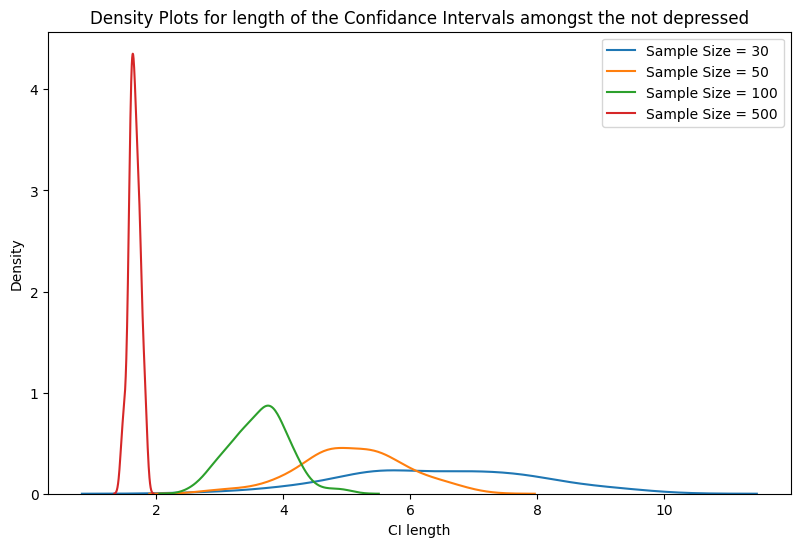

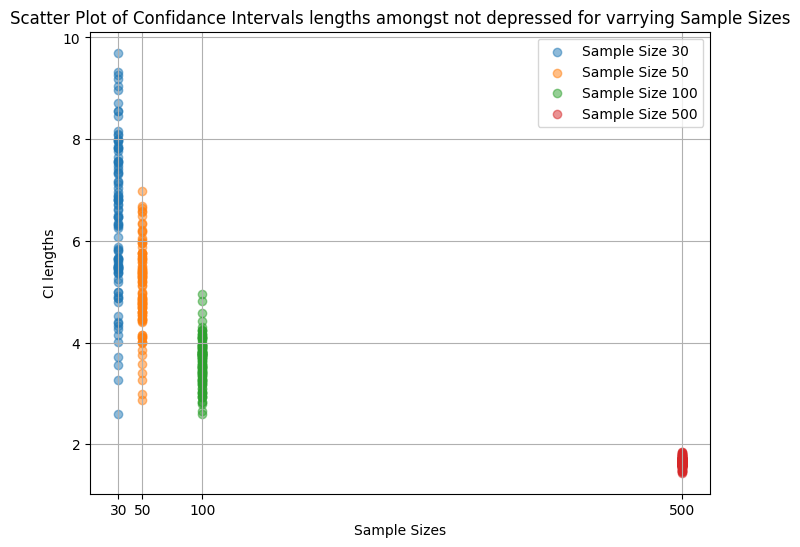

In [135]:


# Create a figure and axis object
fig, ax = plt.subplots(figsize=(9.58, 6))

# Set the x-axis limits
#ax.set_xlim(left=0)

# Plot p-values for Sample Sizes 30 and 50
plot_kde(ax, list_Conf_interval_30s_not_depressed, 30, "CI_not_depressed")
plot_kde(ax, list_Conf_interval_50s_not_depressed, 50, "CI_not_depressed")
plot_kde(ax, list_Conf_interval_100s_not_depressed, 100, "CI_not_depressed")
plot_kde(ax, list_Conf_interval_500s_not_depressed, 500, "CI_not_depressed")

# Add a title and labels
ax.set_title("Density Plots for length of the Confidance Intervals amongst the not depressed")
ax.set_xlabel("CI length")
ax.set_ylabel("Density")

# plotting the scatter plot
Scatter(list_Conf_interval_30s_not_depressed, list_Conf_interval_50s_not_depressed,
        list_Conf_interval_100s_not_depressed, list_Conf_interval_500s_not_depressed,
        'Scatter Plot of Confidance Intervals lengths amongst not depressed for varrying Sample Sizes', 'CI lengths')


###**describing the plots:**


As we can see, from the first two plots, the variance of the p-vals distribution is very big and it shows for both the KDE and Scatter plots.
From the plots for the CI lengths amongst the depressed and not depressed we can observe that as the samples sizes grow, the Confidance Intervals lengths become smaller thus the variance of the sizes decreases. We can see this in the width of the KDE lines and in the decreasing broadness of the points in the Scatter plots.
<br>In addition, there are positive probabilities for a negatie p-val and negative CI lengths according to the plots. this is of course not true so we added the scatter plot to better explain our results.

### Printing the percentages of hit times for the mean inside the calculated Confidance Interval for each size:

In [136]:
print("depressed:")
for i in [30,50,100,500]:
  print("in "+str(sample_conf_interval_dict[i][0])+"% times of the iterations the mean appeared in the Confidence interval of sample size "+str(i))
print("\nnot depressed:")
for i in [30,50,100,500]:
   print("in "+str(sample_conf_interval_dict[i][1])+"% times of the iterations the mean appeared in the Confidence interval of sample size "+str(i))

depressed:
in 92% times of the iterations the mean appeared in the Confidence interval of sample size 30
in 94% times of the iterations the mean appeared in the Confidence interval of sample size 50
in 93% times of the iterations the mean appeared in the Confidence interval of sample size 100
in 97% times of the iterations the mean appeared in the Confidence interval of sample size 500

not depressed:
in 71% times of the iterations the mean appeared in the Confidence interval of sample size 30
in 72% times of the iterations the mean appeared in the Confidence interval of sample size 50
in 87% times of the iterations the mean appeared in the Confidence interval of sample size 100
in 93% times of the iterations the mean appeared in the Confidence interval of sample size 500


Note: The formula for the L-statistic for Q2.6 will be added here